In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv("Mall_Customers.csv") # load dataset
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [18]:
X=dataset.iloc[:, 3:5].values # select features
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [19]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
scaled_X=scx.fit_transform(X)
scaled_X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

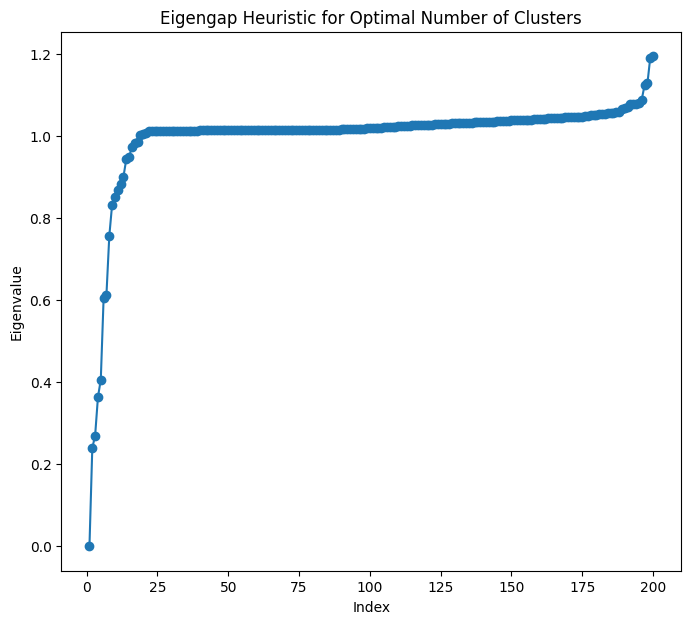

In [26]:
# Eigengap Heuristic
# For Spectral Clustering, the Eigengap Heuristic involves examining the eigenvalues of the Laplacian matrix to find the optimal number of clusters.
from sklearn.metrics.pairwise import rbf_kernel
from scipy.sparse.csgraph import laplacian
from scipy.linalg import eigh

# Compute the similarity matrix
# Adjust the 'gamma' parameter to control the influence of each point.
affinity_matrix = rbf_kernel(scaled_X, gamma=1.0)

# Calculate the normalized Laplacian matrix from the similarity matrix.
laplacian_matrix, _ = laplacian(affinity_matrix, normed=True, return_diag=True)

# Perform eigen decomposition to get the eigenvalues of the Laplacian matrix.
eigenvalues, eigenvectors = eigh(laplacian_matrix)

# print("Eigenvalues:", eigenvalues)

# Plot the eigenvalues to visualize the gaps between them.
# The largest gap often indicates the optimal number of clusters.
plt.figure(figsize=(8, 7))
plt.plot(range(1,len(eigenvalues)+1), eigenvalues, marker='o')
plt.title('Eigengap Heuristic for Optimal Number of Clusters')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.show()

C:\Anaconda3\envs\aiml\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Anaconda3\envs\aiml\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\envs\aiml\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Anaconda3\envs\aiml\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\envs\aiml\Lib\site-packages\sklea

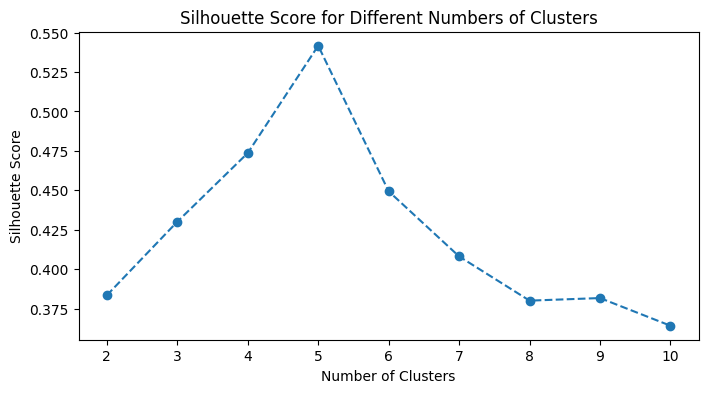

Optimal number of clusters: 5


C:\Anaconda3\envs\aiml\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Anaconda3\envs\aiml\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


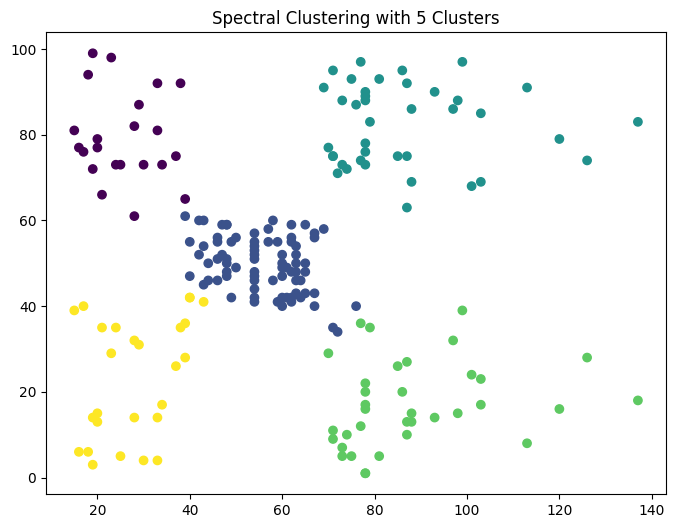

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score


# Function to compute the optimal number of clusters using the Silhouette Score
def find_optimal_clusters(data, max_clusters):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans')
        labels = spectral_clustering.fit_predict(data)
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)
        
    # Plot the Silhouette Score for each number of clusters
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Score for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    # Find the number of clusters with the highest Silhouette Score
    optimal_clusters = np.argmax(silhouette_scores) + 2
    return optimal_clusters

# Find the optimal number of clusters
max_clusters = 10  # You can increase this number if needed
optimal_clusters = find_optimal_clusters(X, max_clusters)

print(f"Optimal number of clusters: {optimal_clusters}")

# Apply Spectral Clustering with the optimal number of clusters
spectral_clustering = SpectralClustering(n_clusters=optimal_clusters, affinity='nearest_neighbors', assign_labels='kmeans')
labels = spectral_clustering.fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title(f'Spectral Clustering with {optimal_clusters} Clusters')
plt.show()


In [28]:
from sklearn.cluster import SpectralClustering
spectral_model = SpectralClustering(n_clusters=6, affinity='rbf', assign_labels='kmeans', random_state=0)
labels= spectral_model.fit_predict(scaled_X)

C:\Anaconda3\envs\aiml\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
supervised=dataset
supervised["Cluster"]=labels
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


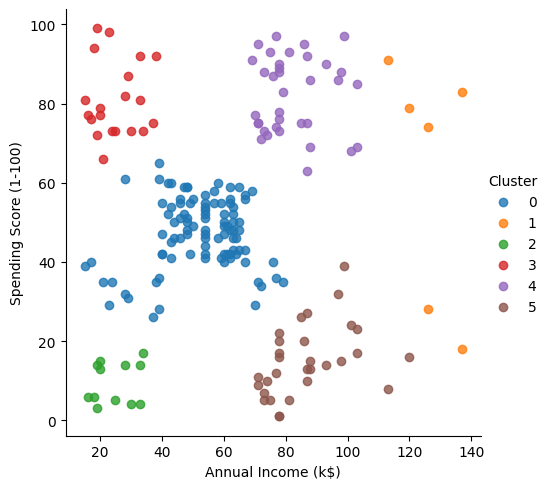

In [36]:
# Plot the clustering result

import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], fit_reg=False )